<a href="https://colab.research.google.com/github/Kontuzhenyi/AI_python/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Набор данных с сайта: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data
# Данная статистика содержит информацию является ли карточная транзакция мошенической
# Характеристики:
# distance_from_home - Расстояние от дома, где произошла транзакция.
# distance_from_last_transaction - Расстояние от места последней транзакции.
# ratio_to_median_purchase_price - Отношение цены сделки к медианной цене покупки.
# repeat_retailer - Транзакция совершена у того же ритейлера.
# used_chip - Проведена ли транзакция с использованием чипа (кредитной карты).
# used_pin_number - Транзакция совершена с использованием PIN-кода.
# online_order - Является ли транзакция онлайн-заказом.
# fraud - Является ли транзакция мошеннической.

In [2]:
#=====================================================
# Загрузка данных
dataset = pd.read_csv('card_transdata.csv', sep=',')
# Возьмем только 10000 строк, в противном случае графики будут очень долго прогружаться.
dataset = dataset.iloc[:len(dataset) // 100]

In [3]:
#=====================================================
# Анализ данных

# Размер датасета, 10000 записей, 8 столбцов
print(dataset.shape)

(10000, 8)


In [4]:
# Отображаем первые 10 строк датасета
print(dataset.head(10))

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   
7            4.848247                        0.320735   
8            0.876632                        2.503609   
9            8.839047                        2.970512   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              

In [5]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              10000 non-null  float64
 1   distance_from_last_transaction  10000 non-null  float64
 2   ratio_to_median_purchase_price  10000 non-null  float64
 3   repeat_retailer                 10000 non-null  float64
 4   used_chip                       10000 non-null  float64
 5   used_pin_number                 10000 non-null  float64
 6   online_order                    10000 non-null  float64
 7   fraud                           10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB
None


In [6]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:
print(dataset.describe())

       distance_from_home  distance_from_last_transaction  \
count        10000.000000                    10000.000000   
mean            26.374744                        4.807107   
std             58.811106                       22.260124   
min              0.049270                        0.000930   
25%              3.808606                        0.305219   
50%             10.026888                        1.006459   
75%             25.866217                        3.313696   
max           2033.498174                      990.070315   

       ratio_to_median_purchase_price  repeat_retailer     used_chip  \
count                    10000.000000     10000.000000  10000.000000   
mean                         1.824164         0.879000      0.350800   
std                          2.762438         0.326144      0.477244   
min                          0.011373         0.000000      0.000000   
25%                          0.489052         1.000000      0.000000   
50%               

In [7]:
print(dataset['fraud'].unique())
# Теперь проверим количество строк, которое принадлежит каждому классу:
print(dataset['fraud'].value_counts())
# Набор данных не сбалансированный. В первом классе 9159, во втором классе 841. Всего классов 2.
# Позже выполнил балансировку.

[0. 1.]
fraud
0.0    9159
1.0     841
Name: count, dtype: int64


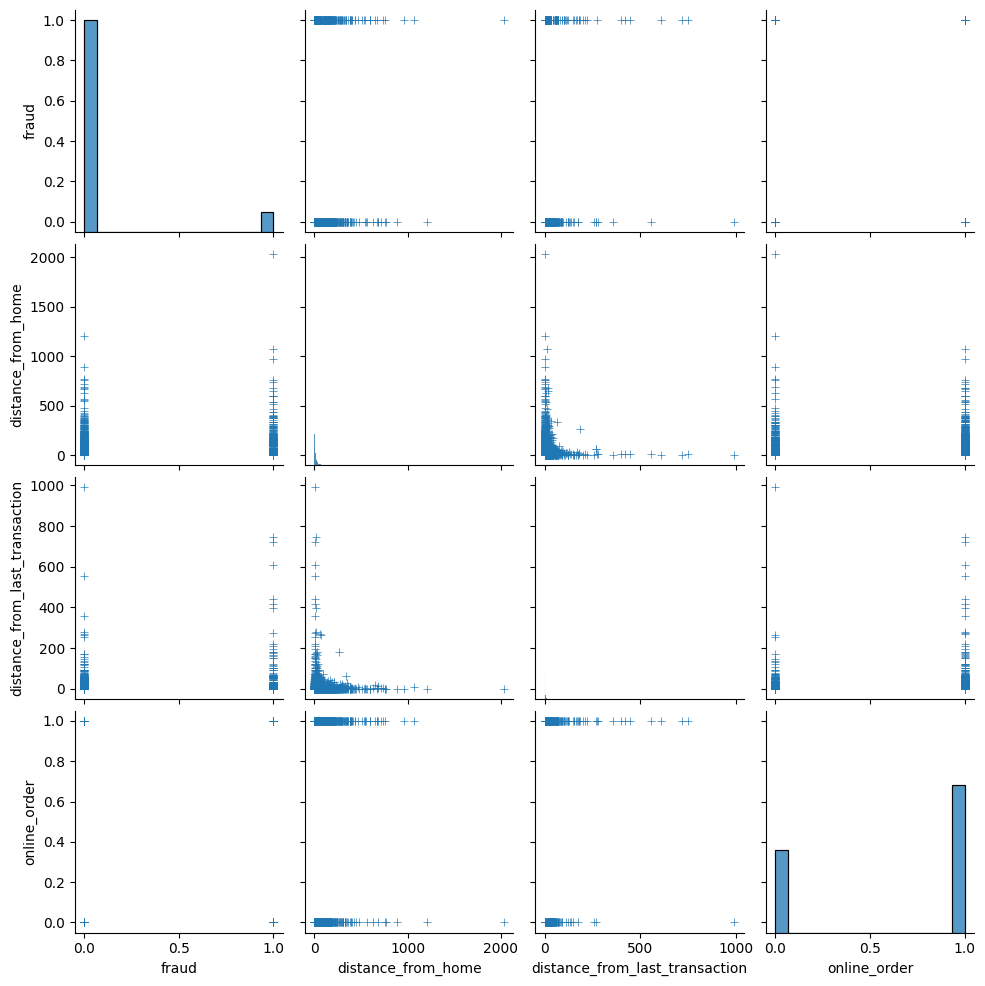

In [8]:
#=====================================================
# Визуализация данных

# Парный график
# Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:
sns.pairplot(dataset[['fraud', 'distance_from_home', 'distance_from_last_transaction', 'online_order']], markers='+')
plt.show()

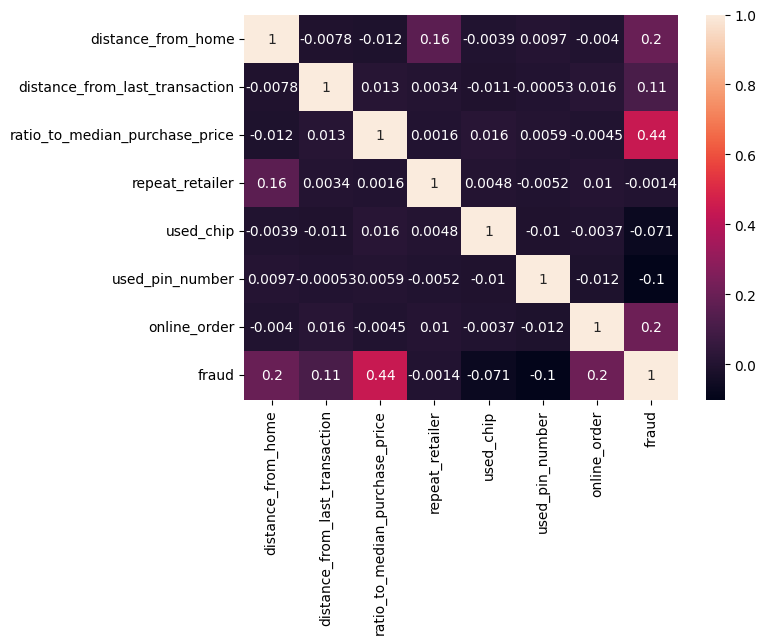

In [9]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

In [10]:
#=====================================================
# Построение модели

# Разделение набора данных
# Y - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич. В нашем случае это столбец fraud.
# В X складываем весь набор данных без целевой переменной.
X = dataset.drop(['fraud'], axis=1)
y = dataset['fraud']
print(f'X shape: {X.shape} | y shape: {y.shape} ')
# X имеет 10 000 строк и 7 столбца, тогда как Y имеет 10 000 строк и только один столбец.

X shape: (10000, 7) | y shape: (10000,) 


In [11]:
# Train Test разделение
# Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

if sum(y_train) < len(y_train) / 2:
    # Если класс-меньшинство составляет менее половины выборки, используем oversampling
    oversampler = SMOTE()
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
else:
    # В противном случае используем undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [12]:
#=====================================================
# Обучение и выбор оптимальной модели
# Далее попробуем следующие алгоритмы:
# Logistic Regression (LR) Linear Discriminant Analysis (LDA) K-Nearest Neighbors (KNN) Classification and Regression Trees (CART) Gaussian Naive Bayes (NB) Support Vector Machines (SVM)

# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Судя по всему CART переобучена, поэтому будем работать с SVC.
# Давайте обучим модель SVC на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

LR: 0.942495 (0.005133)
LDA: 0.929518 (0.002537)
KNN: 0.956768 (0.006081)
CART: 0.998634 (0.000916)
NB: 0.838889 (0.033523)
SVC: 0.968310 (0.004323)


In [13]:
#=====================================================
# Обучение конкретной модели.
# Выполним нормализацию данных.

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_resampled)
scaled_x_test = scaler.transform(X_test)

# Выберем для модели SVC параметры kernel и C
svc = SVC()
grid_model = GridSearchCV(svc, {'kernel': ['linear', 'poly', 'rbf'], 'C': range(1, 5)}, cv = 5)
grid_model.fit(scaled_x_train, y_resampled)
print(grid_model.best_params_)

{'C': 4, 'kernel': 'rbf'}


In [14]:
# Обучим модель на лучших параметрах и на обучающем наборе данных
svc = SVC(kernel=grid_model.best_params_['kernel'], C=grid_model.best_params_['C'])
svc.fit(scaled_x_train, y_resampled)
y_pred = svc.predict(scaled_x_test)

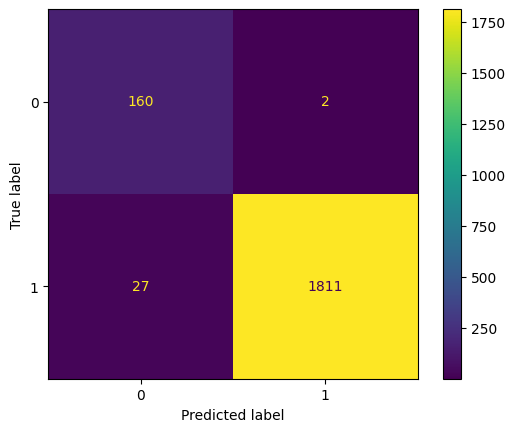

In [15]:
#=====================================================
# Визуализация решения
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()

In [16]:
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1838
         1.0       0.86      0.99      0.92       162

    accuracy                           0.99      2000
   macro avg       0.93      0.99      0.95      2000
weighted avg       0.99      0.99      0.99      2000

